# Лабораторная работа 6. 
# Сетевые алгоритмы. Динамические алгоритмы поиска путей.


## Выполнил студент группы ФИО ГРУППА
***

### Задание

1.  Реализовать алгоритм поиска кратчайшего расстояния между двумя вершинами ориентированного взвешенного графа в соответствии с вариантом. 

2.  Предусмотреть задание графа в виде матрицы смежности/инцидентности, читаемой из файла, либо графически с помощью пользовательского интерфейса. 

3.  Разработать графический интерфейс пользователя с визуализацией графа и отображением кратчайшего расстояния между задаваемыми пользователем вершинами.

4. По результатам работы проанализировать временную сложность работы заданного алгоритма в зависимости от числа узлов и ребер графа.
Данные представить в виде таблицы.



### Алгоритмы:

Алгоритм Флойда-Уоршелла| Алгоритм Дейкстры | Алгоритм Беллмана-Форда | Алгоритм Джонсона| Алгоритм Левита | Алгоритм Йена



### Выполнение:

## Подтягиваемые библиотеки

In [2]:
import networkx as nx
import math
import matplotlib.pyplot as plt
import numpy as np
from collections import defaultdict 
import copy
import time

inf = np.iinfo('int').max
restable = []

def read_graph(file):
    mat = []
    with open(file, 'r') as fd:
        for line in fd:
            temp = []
            for num in line.split(","):
                if num == 'inf':
                    temp.append(0)
                else:
                    temp.append(int(num))
            mat.append(temp)
    return nx.from_numpy_matrix(np.matrix(mat), create_using = nx.DiGraph)

def convert_adjmat(adjmat):
    ret = []
    for i in range(len(adjmat)):
        ret.append([])
        for j in range(len(adjmat)):
            ret[i].append(adjmat[i, j])
            if adjmat[i, j] == 0 and i != j:
                ret[i][j] = inf
    return ret

def draw_graph(graph, path = None):
    colors = None
    if path:
        colors = []
        for item in graph.edges():
            try:
                index1 = path.index(item[0])
                index2 = path.index(item[1])
                if index1 + 1 != index2 and index1 - 1 != index2:
                    raise
                colors.append('red')
            except:
                colors.append('black')
    pos = nx.circular_layout(graph)
    labels = nx.get_edge_attributes(graph, 'weight')
    nx.draw_networkx_nodes(graph, node_color = 'green', node_size = 200, pos = pos)
    nx.draw_networkx_edges(graph,edge_color = colors, pos = pos, arrowstyle = 'simple, tail_width = 0.05')
    nx.draw_networkx_labels(graph, pos = pos)
    nx.draw_networkx_edge_labels(graph, pos = pos, edge_labels = labels)

## Алгоритм Флойда-Уоршелла

[0, 3, 1, 3, inf, inf]
[3, 0, 4, inf, inf, inf]
[1, 4, 0, inf, 7, 5]
[3, inf, inf, 0, inf, 2]
[inf, inf, 7, inf, 0, 4]
[inf, inf, 5, 2, 4, 0]
[1, 0]
0.002001523971557617


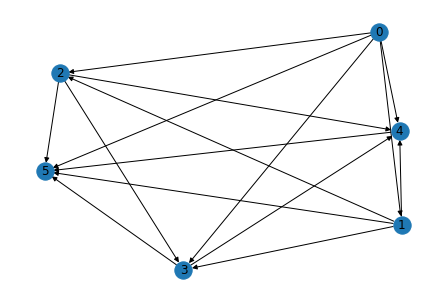

In [3]:
tic = time.time()

try:
  # считываем текстовый файл
#     with open("C:/Users/Денис/Python_SIAOD/SIAOD_Denis_Smirnov/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
    with open("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
        matrix = [[int(num) for num in line.split(',')] for line in fileDij] # загружаем матрицу дорог графа
        
        for i in range(len(matrix)):
            for j in range(len(matrix[i])):
                if i!=j and matrix[i][j]==0:
                    matrix[i][j] = math.inf
        
        for i in matrix:  
            print(i)
            
        def get_path(P, u, v):
            # Сначала записываем в список path пройденных путей конечную вершину
            path = [u]
            # Будем записывать в path все вершины, пока не придем до начальной
            while u != v:
                # Номер промежуточной вершины
                u = P[u][v]
                path.append(u)
            return path
    
        # Число вершин в графе
        N = len(matrix) 
        # Начальный список предыдущих вершин для поиска кратчайших маршрутов
        P = [[v for v in range(N)] for u in range(N)] 
        
        
        # Реализация алгоритма Флойда-Уоршелла
        for k in range(N):
            for i in range(N):
                for j in range(N):
                    # Проходимся по дополнительным вершинам к
                    d = matrix[i][k] + matrix[k][j]
                    # Если маршрут через доп. точки оказался меньше, чем тот, который был в самой матрице,
                    # то сохраняем его и сохраняем номер вершины к, через которую нужно пройти
                    if matrix[i][j] > d:
                        matrix[i][j] = d
                        P[i][j] = k
        
        end = 1
        start = 0
        print(get_path(P, end, start))
        tac = time.time()
        floyd_time = tac-tic
        print(floyd_time)
        
        graph = nx.Graph(np.matrix(matrix))
        nx.draw(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=300, arrows=True)
        
except FileNotFoundError:
    print("Файл не был найден") 

## Алгоритм Дейкстры

[0, 3, 1, 3, 0, 0]
[3, 0, 4, 0, 0, 0]
[1, 4, 0, 0, 7, 5]
[3, 0, 0, 0, 0, 2]
[0, 0, 7, 0, 0, 4]
[0, 0, 5, 2, 4, 0]
N=  6
Длины кратчайших путей от вершины 1 до всех остальных вершин соотвественно: 
[0, 3, 1, 3, 8, 5]
0.002989530563354492


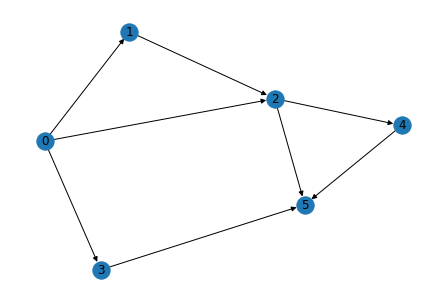

In [4]:
def __dijkstra(adjmat, start):
    dist = [inf for item in adjmat]
    dist[start] = 0
    vert = start
    paths = [[start] for item in adjmat]
    nextdist = dist.copy()
    for k in range(len(dist)):
        for i in range(len(dist)):
            if adjmat[vert][i] != inf and dist[vert] != inf and dist[i] > adjmat[vert][i] + dist[vert]:
                dist[i] = adjmat[vert][i] + dist[vert]
                nextdist[i] = dist[i]
                paths[i] = paths[vert].copy()
                paths[i].append(i)
        nextdist[vert] = inf
        vert = min(range(len(nextdist)), key = nextdist.__getitem__)
    return dist, paths

def dijkstra(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __dijkstra(adjmat, start)
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Красным отмечен короткий путь из {start} в {end}")
    print(f"Длина пути {dist[end]}")
    draw_graph(graph, paths[end])
    
tic = time.time()    
try:
  #считываем текстовый файл
#     with open("C:/Users/Денис/Python_SIAOD/SIAOD_Denis_Smirnov/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
    with open("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt", "r", encoding = "utf-8") as fileDij:
        matrix = [[int(num) for num in line.split(',')] for line in fileDij] #загружаем матрицу дорог графа
        
        for i in matrix:  
            print(i)
        
        N = len(matrix) #число вершин в нашем графе
        print("N= ", N)
        T = [math.inf] * N #финальная строка длин (inf - бесконечность)
        startV = 0 #стартовая вершина
        viewedV = {startV} #множество просмотренных вершин (в зависимости от старnовой вершины)
        T[startV] = 0 #нулевой вес стартовой вершины должен быть равен 0!

        #метод перебора всех связанных вершин
        #просматриваем все веса других, связанных с startV вершин, и возвращаем вершину с мин.значением
        def getLinkWithV(startV, matrix):
            for i, weight in enumerate(matrix[startV]): #берём веса в графе 
                if (weight > 0):
                    yield i

        #метод нахождения в таблицы вершины с мин.весом
        def findMinWei(T, viewedV):
            amin = -1 #начальный минимум, начальное состояние
            m = max(T) #находим макс.значение финимальной строки
            for i, t in enumerate(T):
                if (t < m and i not in viewedV): #находим мин.значение вершин, которые не были ещё рассмотрены
                    m = t
                    amin = i
            return amin #возвращаем вершину с мин.значением

        #заполяем T-табличку мин.весами
        while (startV != -1): #цикл для прохождению по вершинам (если -1, то по всем вершинам прошли)
            for j in getLinkWithV(startV, matrix): #перебераем все связанные вершины с вершиной startV
                if (j not in viewedV): #если рассматриваемая строка таблицы не была просмотрена
                    wei = T[startV] + matrix[startV][j] #получаем путь, что прошли до минимальной вершины
                if (wei < T[j]): #если вес меньше последней позиции нашей финальной строки
                    T[j] = wei #присваиваем минимальное значение, то есть меняем мин.длину
          #должны найти мин.аргумент между последней строчкой и множеством, что уже было просмотрено
            startV = findMinWei(T, viewedV) #находим мин.значение вершины
            if (startV > 0):
                viewedV.add(startV)
        print("Длины кратчайших путей от вершины 1 до всех остальных вершин соотвественно: ")
        print(T)
        tac = time.time()
        dij_time= tac - tic
        print(dij_time)
        
        graph = nx.Graph(np.matrix(matrix))
        nx.draw(graph, pos=nx.spring_layout(graph), with_labels=True, node_size=300, arrows=True)
        
except FileNotFoundError:
    print("Файл не был найден") 

## Алгоритм Беллмана-Форда

Начальная вершина:1
Конечная врешина:3


<ipython-input-5-366793487b36>:47: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())


Кратчайший путь из 1 в 3
Длина пути 6
0.09908199310302734


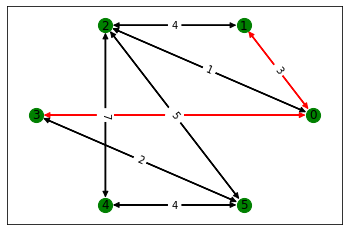

In [5]:
# def BF(nodes, edges, src):
#     path_lens = {}
#     for i in range(len(nodes)):
#         path_lens[i] = math.inf
#     path_lens[src] = 0
    
#     paths = {}
#     for i in range(len(nodes)):
#         paths[i] = []
#     paths[src] = [src]
    
#     for i in range(len(nodes)-1):
#         for (u,v), w_uv in edges.items():
#             if path_lens[u] + w_uv < path_lens[v]:
#                 path_lens[v] = path_lens[u] + w_uv
#                 paths[v] = paths[u] + [v]
#     return path_lens, paths

# nodes = [0,1,2,3,4,5]
# edges = {(0,1):1.0, (1,0):1.0, (0,2):1, (2,0):1,
#         (0,3):2.0, (3,0):2.0, (1,3): 0, (3,1):0,
#         (1,4):3, (4,1):3, (2,3):1, (3,2):1,
#         (4,5):2.0, (5,4):2.0, (5,3):-1.0}

# shortest_path_lens, shortest_paths = BF(nodes, edges, 2)

# print(shortest_path_lens)
# print(shortest_paths)


def __bellman_ford(adjmat, start):
    # Определяем расстояния от исходной вершины до всех остальных
    dist = [inf for item in adjmat]
    dist[start] = 0
    paths = [[start] for item in adjmat]
    for i in range(len(adjmat)):
        for u in range(len(adjmat)):
             for v in range(len(adjmat)):
                    # Проверяем, есть ли вес с отрицательным значением
                    if dist[u] != inf and adjmat[u][v] != inf and dist[v] > dist[u] + adjmat[u][v]:
                        dist[v] = dist[u] + adjmat[u][v]
                        paths[v] = paths[u].copy()
                        paths[v].append(v)
    return dist, paths

def bellman_ford(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __bellman_ford(adjmat, start)
    # Вычисляются самые короткие расстояния
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Кратчайший путь из {start} в {end}")
    print(f"Длина пути {dist[end]}")
    draw_graph(graph, paths[end])

graph = read_graph("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt")
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
tic = time.time()
bellman_ford(graph, node1, node2)
tac = time.time()
bellman = tac-tic
print(bellman)
            

## Алгоритмы Джонсона

Начальная вершина:1
Конечная врешина:3


<ipython-input-6-deb2b56e655d>:26: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())


Кратчайший путь из 1 в 3
Длина пути 6
0.0588076114654541


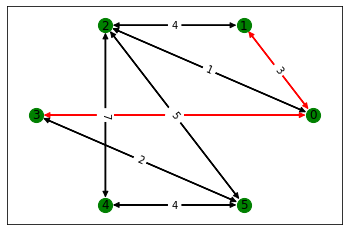

In [6]:
def __jonson(adjmat):
    adjmatf = adjmat.copy()
    for item in adjmatf:
        item.append(inf)
    adjmatf.append([])
    for i in range(len(adjmatf)):
        adjmatf[-1].append(0)
    bell_dist, paths = __bellman_ford(adjmatf, len(adjmatf) - 1)
    for u in range(len(adjmat)):
        for v in range(len(adjmat)):
            if adjmat[u][v] != inf and bell_dist[u] != inf and bell_dist[v] != inf:
                adjmat[u][v] += bell_dist[u] - bell_dist[v]
    resdist = []
    respaths = []
    for i in range(len(adjmat)):
            dist, paths = __dijkstra(adjmat, i)
            resdist.append(dist)
            respaths.append(paths)
    for u in range(len(adjmat)):
        for v in range(len(adjmat)):
            if resdist[u][v] != inf and bell_dist[u] != inf and bell_dist[v] != inf:
                resdist[u][v] +=  bell_dist[v] - bell_dist[u]
    return resdist, respaths

def jonson(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __jonson(adjmat)
    if len(paths[start][end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Кратчайший путь из {start} в {end}")
    print(f"Длина пути {dist[start][end]}")
    draw_graph(graph, paths[start][end])

graph = read_graph("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt")
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
tic = time.time()
jonson(graph, node1, node2)
tac = time.time()
jonson = tac-tic
print(jonson)

## Алгоритм Левита

Начальная вершина:1
Конечная врешина:3


<ipython-input-7-2cc612e20182>:43: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())


Кратчайший путь из 1 в 3
Длина пути 6
0.058193206787109375


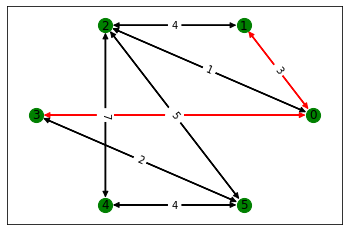

In [7]:
def __levit(adjmat, start):
    dist = [inf for item in adjmat]
    dist[start] = 0
    # массив, содержащий текущих предков
    paths = [[start] for item in adjmat]
    m0 = set() # вершины, расстояние до которых уже вычислено
    m1 = {'main': [start], 'urgent': []} # вершины, расстояние до которых вычисляется
    m2 = set(range(len(adjmat))) # вершины, расстояние до которых ещё не вычислено
    m2.remove(start)
    while len(m1['main']) or len(m1['urgent']):
        u = None
        if len(m1['urgent']):
            u = m1['urgent'].pop(0)
        else:
            u = m1['main'].pop(0)
        for v in range(len(adjmat)):
            if dist[u] == inf or adjmat[u][v] == inf:
                continue
            # если вершина v принадлежит m2, то v переносим в m1 в конец
            if v in m2:
                m2.remove(v)
                m1['main'].append(v)
                dist[v] = min(dist[v], dist[u] + adjmat[u][v])
                paths[v] = paths[u].copy()
                paths[v].append(v)
            # Если v принадлежит m1, то пытаемся улучшить значение dist[v]
            elif v in m1['main'] or v in m1['urgent']:
                dist[v] = min(dist[v], dist[u] + adjmat[u][v])
                paths[v] = paths[u].copy()
                paths[v].append(v)
            # Если v принадлежит m0, и если dist[v] можно улучшить.
            # то улучшаем dist[v], а вершину v возвращаем в множество m1, помещая её в начало
            elif v in m0 and dist[v] > dist[u] + adjmat[u][v]:
                m0.remove(v)
                m1['urgent'].append(v)
                dist[v] = dist[u] + adjmat[u][v]
                paths[v] = paths[u].copy()
                paths[v].append(v)
        m0.add(u)
    return dist, paths

def levit(graph, start, end):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dist, paths = __levit(adjmat, start)
    if len(paths[end]) == 1:
        print(f"Путь из {start} в {end} не существует")
        draw_graph(graph)
        return
    print(f"Кратчайший путь из {start} в {end}")
    print(f"Длина пути {dist[end]}")
    draw_graph(graph, paths[end])

graph = read_graph("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt")
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
tic = time.time()
levit(graph, node1, node2)
tac = time.time()
lewitt = tac - tic
print(lewitt)

## Алгоритм Йена

Начальная вершина:1
Конечная врешина:3
Колличество путей:2


<ipython-input-8-1a57dcc4452c>:53: FutureWarning: adjacency_matrix will return a scipy.sparse array instead of a matrix in Networkx 3.0.
  adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())


1-й короткий путь из 1 в 3
Длина пути 6


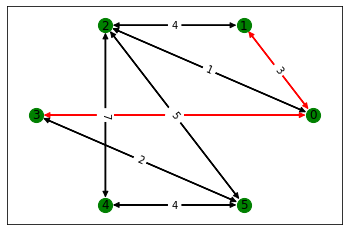

2-й короткий путь из 1 в 3
Длина пути 8


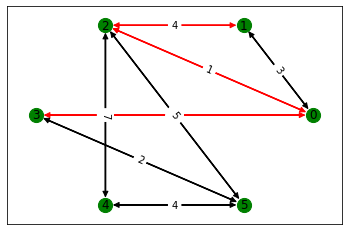

0.5207338333129883


In [8]:
def __yen(adjmat, start, end, K):
    candidates = set()
    dists, paths = __bellman_ford(adjmat, start)
    resultPaths = [paths[end]]
    resultDists = [dists[end]]
    if len(resultPaths[0]) == 1:
        return result

    for k in range(1, K):
        mat = copy.deepcopy(adjmat)
        for i in range(len(resultPaths[-1]) - 1):
            spurNode = resultPaths[-1][i]
            rootPath = resultPaths[-1][:i + 1]
            
            for path in resultPaths:
                if rootPath == path[:i + 1]:
                    mat[path[i]][path[i + 1]] = inf
            
            for node in rootPath:
                if node != spurNode:
                    mat[node] = [inf for j in range(len(adjmat))]

            dists, paths = __bellman_ford(mat, spurNode)
            
            spurPath = paths[end][1:]
            if len(spurPath) == 0:
                continue
            
            totalPath = rootPath
            totalPath.extend(spurPath)
            totalPath = tuple(totalPath)
            
            totalDist = 0
            for j in range(1, len(totalPath)):
                totalDist += adjmat[totalPath[j - 1]][totalPath[j]]
            
            candidates.add((totalPath, totalDist))
        
        if not len(candidates):
            break
        
        candidates_l = list(candidates)
        candidates_l.sort(key = lambda x: x[1])
        
        resultPaths.append(list(candidates_l[0][0]))
        resultDists.append(candidates_l[0][1])
        
        candidates.remove(candidates_l[0])
                    
    return resultDists, resultPaths

def yen(graph, start, end, K):
    adjmat = convert_adjmat(nx.adjacency_matrix(graph).todense())
    dists, paths = __yen(adjmat, start, end, K)
    
    for path, dist, i in zip(paths, dists, range(len(paths))):
        print(f"{i + 1}-й короткий путь из {start} в {end}")
        print(f"Длина пути {dist}")
        plt.figure(i)
        draw_graph(graph, path)
        plt.show()
    

graph = read_graph("C:/Users/Денис/Python_SIAOD/Python_SIAOD/Labs/Matrix_6.txt")
node1 = int(input('Начальная вершина:'))
node2 = int(input('Конечная врешина:'))
k = int(input('Колличество путей:'))
tic = time.time()
yen(graph, node1, node2, k)
tac = time.time()
yen = tac- tic
print(yen)

### Вывод

In [9]:
import pandas as pd
table = [["Алгоритм Флойда-Уоршелла", str(floyd_time)],
        ["Алгоритм Дейкстры", str(dij_time)],
        ["Алгоритм Беллмана-Форда", str(bellman)],
        ["Алгоритм Джонсона", str(jonson)],
        ["Алгоритм Левита", str(lewitt)],
        ["Алгоритм Йена", str(yen)]]

pd.DataFrame(table, columns=["Алгоритм","Время выполнения"])

,Алгоритм,Время выполнения
0,Алгоритм Флойда-Уоршелла,0.002001523971557617
1,Алгоритм Дейкстры,0.002989530563354492
2,Алгоритм Беллмана-Форда,0.09908199310302734
3,Алгоритм Джонсона,0.0588076114654541
4,Алгоритм Левита,0.058193206787109375
5,Алгоритм Йена,0.5207338333129883
